<h1 align="center">Lecture</h1>

## Активации из сетей для классификации, это хорошие признаки для изображений

<img src="img/act.png" width="800">


## Современные архитектуры очень глубокие , самые модные 

### VGG (стандартная архитектура, без наворотов)

<img src="img/vgg.png" width="600">

### ResNet (Shortcut + Batch Normalization)
 
<img src="img/resnet.png" width="800">
 
### GoogleNet (Много раз предсказываем классы на разных уровнях сети)

 
<img src="img/gln.png" width="800">


## Чем глубже слой тем более высокоуровневые признаки он детектирует

<img src="img/feat.png" width="800">

## На практике гораздо проще дообучать уже обученные сети (Fine-Tuning)

<img src="img/ft.jpg" width="600">

## Dark Magic 

<img src="img/dm.png" width="600">

# Сегодня Theano and Lasagne :)

<h1 align="center">Theano</h1>

```bash
pip install -U https://github.com/Theano/Theano/archive/master.zip
pip install -U https://github.com/Lasagne/Lasagne/archive/master.zip
```

### Разминка

In [1]:
import theano
import theano.tensor as T

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### будущий параметр функции -- символьная переменная

In [4]:
N = T.scalar('a dimension', dtype='float32')

#### рецепт получения квадрата -- орперации над символьными переменным

In [5]:
result = T.power(N, 2)

#### theano.grad(cost, wrt)

In [6]:
grad_result = theano.grad(result, N) 

#### компиляция функции "получения квадрата"

In [7]:
sq_function = theano.function(inputs=[N], outputs=result)
gr_function = theano.function(inputs=[N], outputs=grad_result)

In [14]:
sq_function(5)

array(25.0, dtype=float32)

#### применение функции

In [17]:
# Заводим np.array x
xv = np.arange(-10, 10)

# Применяем функцию к каждому x
val = list(map(float, [sq_function(x) for x in xv]))

# Посичтаем градиент в кажой точке
grad = list(map(float, [gr_function(x) for x in xv]))

### Что мы увидим если нарисуем функцию и градиент?

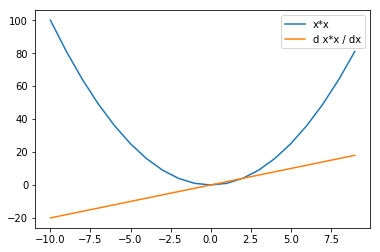

In [18]:
pylab.plot(xv, val, label='x*x')
pylab.plot(xv, grad, label='d x*x / dx')
pylab.legend()

### Как оно работает?
* почти всё, что есть в numpy есть в theano tensor и называется так же: `np.mean -> T.mean` и так далее...
* `theano.function` умеет за одно обновлять `shared` переменные по рецепту в `updates`
* Переменные нужно хранить в `shared` переменных, их можно менять после компиляции `theano.shared(np.ones(10))`

 
Ничего не понятно? Сейчас исправим.

### Теперь сам, LogReg

In [20]:
from sklearn import datasets
X_data, y_data = datasets.load_digits(2, return_X_y=True)

In [24]:
print('y метки классов 0 или 1 [форма - {}]:'.format((str(y_data.shape)),y[:10]))
print('X циферки вытянутые в вектор [форма - %s]:'.format((str(X_data.shape))))
print(X_data[0].reshape((8, 8)))

y метки классов 0 или 1 [форма - (360,)]:
X циферки вытянутые в вектор [форма - %s]:
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [25]:
X_data.shape

(360, 64)

In [26]:
y_data

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0,

In [42]:
# переменные и входы

## My code starts
W = theano.shared(np.random.uniform(-0.1, 0.1, size=X_data.shape[1]))
X = T.matrix('input batch')
y = T.vector('labels')
## My code ends

In [43]:
## My code starts
learning_rate = 0.01
predicted_y = T.nnet.sigmoid(T.dot(X, W))
loss = -(y*T.log(predicted_y)+(1-y)*T.log(1-predicted_y)).mean()
grad = T.grad(loss, W)
updates = {W: W-learning_rate*grad}
## My code ends

In [44]:
## My code starts
train_function = theano.function([X, y], loss, updates=updates)
predict_function = theano.function([X], predicted_y)
## My code ends

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data)

 loss at iter 0:0.5839
 train auc: 0.998132791477
 test auc: 0.999505195448
 loss at iter 1:1.2301
 train auc: 0.999176231534
 test auc: 0.999505195448
 loss at iter 2:0.9530
 train auc: 0.999945082102
 test auc: 1.0
 loss at iter 3:0.1196
 train auc: 0.999945082102
 test auc: 1.0
 loss at iter 4:0.0249
 train auc: 0.999945082102
 test auc: 1.0
resulting weights:


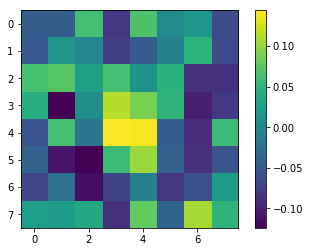

In [46]:
from sklearn.metrics import roc_auc_score

for i in range(5):
    loss_i = train_function(X_train,y_train)
    print(' loss at iter %i:%.4f' % (i, loss_i)),
    print(' train auc:', roc_auc_score(y_train, predict_function(X_train))),
    print(' test auc:', roc_auc_score(y_test, predict_function(X_test)))
    
print ("resulting weights:")
plt.imshow(W.get_value().reshape(8,-1))
plt.colorbar()

<h1 align="center">Lasagne</h1>

* lasagne - это библиотека для написания нейронок произвольной формы на theano
* В качестве демо-задачи выберем то же распознавание чисел, но на большем масштабе задачи, картинки 28x28, 10 цифр

In [2]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print('X размера', X_train.shape, 'y размера', y_train.shape)

X размера (50000, 1, 28, 28) y размера (50000,)


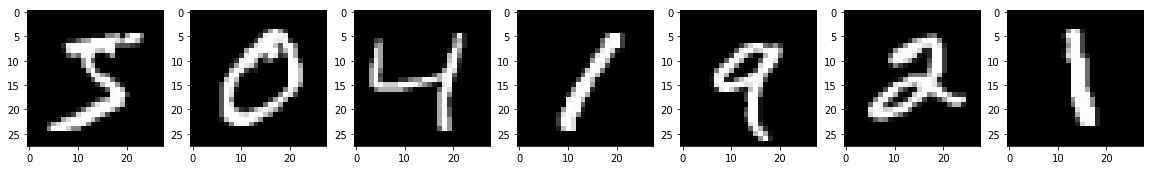

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 20))

for i, ax in enumerate(axes):
    ax.imshow(X_train[i, 0], cmap='gray')

Давайте посмотрим на DenseLayer в lasagne
- http://lasagne.readthedocs.io/en/latest/modules/layers/dense.html
- https://github.com/Lasagne/Lasagne/blob/master/lasagne/layers/dense.py#L16-L124 
- Весь содаржательный код тут https://github.com/Lasagne/Lasagne/blob/master/lasagne/layers/dense.py#L121 

In [32]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import softmax
from sklearn.preprocessing import OneHotEncoder
from lasagne import init

X, y = T.tensor4('X'), T.vector('y', 'int32')

Так задаётся архитектура нейронки

In [55]:
#входной слой (вспомогательный)
net = lasagne.layers.InputLayer(shape=(None, 1, 28, 28), input_var=X)

net = lasagne.layers.Conv2DLayer(net, 16, 3, stride=3) # сверточный слой
net = lasagne.layers.Conv2DLayer(net, 16, 3, W=init.Constant())  # сверточный слой

net = lasagne.layers.DenseLayer(net, num_units=64) # полносвязный слой
net = lasagne.layers.DropoutLayer(net, 0.5)         # регуляризатор
net = lasagne.layers.DenseLayer(net, num_units=64) # полносвязный слой

net = lasagne.layers.DenseLayer(net, num_units=10, nonlinearity=softmax)  # полносвязный слой

In [56]:
#предсказание нейронки (theano-преобразование)
y_predicted = lasagne.layers.get_output(net, deterministic=True)

In [57]:
#все веса нейронки (shared-переменные)
all_weights = lasagne.layers.get_all_params(net)
print(all_weights)

[W, b, W, b, W, b, W, b, W, b]


In [58]:
from lasagne.regularization import l1, l2

In [59]:
#функция ошибки и точности будет прямо внутри
# loss = lasagne.objectives.categorical_crossentropy(y_predicted, y).mean() + lasagne.regularization.regularize_layer_params(net, l2)
loss = lasagne.objectives.categorical_crossentropy(y_predicted, y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, y).mean()

In [60]:
#сразу посчитать словарь обновлённых значений с шагом по градиенту, как раньше
# updates = lasagne.updates.momentum(loss, all_weights, learning_rate=0.1, momentum=0.5)
updates = lasagne.updates.adagrad(loss, all_weights, learning_rate=0.1)

In [61]:
#функция, делает updates и возвращащет значение функции потерь и точности
train_fun = theano.function([X, y], [loss, accuracy], updates=updates)
accuracy_fun = theano.function([X, y], accuracy) # точность без обновления весов, для теста

# Процесс обучения

In [62]:
import time
from mnist import iterate_minibatches

num_epochs = 10 #количество проходов по данным
batch_size = 100 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err, train_acc, train_batches = 0, 0, 0
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch = train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc, val_batches = 0, 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1
    
    # Then we print the results for this epoch:
    print('Epoch %s of %s took' % (epoch + 1, num_epochs))
    print('\t training loss:\t\t %.5f' % (train_err / train_batches))
    print('\t train accuracy:\t %s' % (train_acc / train_batches * 100))
    print('\t validation accuracy:\t %s' % (val_acc / val_batches * 100))

Epoch 1 of 10 took
	 training loss:		 2.33399
	 train accuracy:	 11.29
	 validation accuracy:	 10.64
Epoch 2 of 10 took
	 training loss:		 2.30143
	 train accuracy:	 11.356
	 validation accuracy:	 10.64
Epoch 3 of 10 took
	 training loss:		 2.30134
	 train accuracy:	 11.356
	 validation accuracy:	 10.64
Epoch 4 of 10 took
	 training loss:		 0.98376
	 train accuracy:	 64.086
	 validation accuracy:	 93.13
Epoch 5 of 10 took
	 training loss:		 0.22161
	 train accuracy:	 93.308
	 validation accuracy:	 94.69
Epoch 6 of 10 took
	 training loss:		 0.16721
	 train accuracy:	 94.934
	 validation accuracy:	 95.66
Epoch 7 of 10 took
	 training loss:		 0.13710
	 train accuracy:	 95.752
	 validation accuracy:	 96.16
Epoch 8 of 10 took
	 training loss:		 0.11721
	 train accuracy:	 96.324
	 validation accuracy:	 96.59
Epoch 9 of 10 took
	 training loss:		 0.10399
	 train accuracy:	 96.762
	 validation accuracy:	 96.94
Epoch 10 of 10 took
	 training loss:		 0.09485
	 train accuracy:	 97.022
	 validati

In [63]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results: \n test accuracy:\t\t{:.2f} %".format(test_acc / test_batches * 100))

Final results: 
 test accuracy:		96.69 %


# не забывайте оставлять отзывы 
# о лекции https://goo.gl/gMeYNL о семинаре https://goo.gl/5hlPD0 :)